# Script for Cleaning raw files

In [8]:
import os
import tqdm
import json
import datetime
import numpy as np
import pandas as pd
from collections import  Counter
from IPython.display import clear_output


In [9]:
def copy_PATH(src  = '/media/rdverse/Hippocampus/faceData/data', dest = '.'):
    """ create a link for data path in current dir
    args:
        dest (str) : where you want to create the symbolic link
    Returns:
        PATH of data directory
    """
    
    while not os.path.isdir(src):
        src = input("Enter path of data dir here")
                
    if not os.path.exists('data'):
        os.symlink(PATH, 'data')

    return 'data'

PATH = copy_PATH() 


# Functions to clean raw data file

In [10]:
def get_resultants(dataDf):
    """load resultant

    Args:
        dataDf (pd : df): loaded dataframe with raw data

    Returns:
        pd : df: loaded df with resultant columns
    """
    
    colsNeeded = ['Accel_LN_', 'Accel_WR_', 'Gyro_','Mag_']
    
    for colRes in colsNeeded:
        try:
            dataDf['Resultant_' + colRes] = np.sqrt(np.square(dataDf[colRes + 'X_CAL']) + 
                                            np.square(dataDf[colRes + 'Y_CAL']) + 
                                            np.square(dataDf[colRes + 'Z_CAL']))
        except:
            print("Issue with %s" % colRes)

    return dataDf

def process_rawdata(PATH):
    """load raw data

    Args:
        PATH (str): path to the file

    Returns:
        pd : df: raw data with resultant and timestamp loaded
    """
    #read file
    dataDf = pd.read_csv(PATH, sep = '\t', header=0)
    #drop last col with nan
    dataDf.dropna(axis=1, inplace = True)
    #rename cols
    newColNames = [name + '_' + dataDf.iloc[1].values[i] for i,name in enumerate(dataDf.iloc[0].values)]
    # change header
    dataDf = dataDf.set_axis(newColNames, axis=1, inplace=False)[3:].reset_index(drop=True)
    # switch values to float
    dataDf = dataDf.astype(float)
    # get resultant vals
    dataDf = get_resultants(dataDf)
    # add time to df
    rawTime = file_name_splitter(PATH, type='d')
    dataDf['TimeStamp'] = [datetime.datetime.strptime(str(rawTime), "%Y%m%d%H%M%S") +
                       datetime.timedelta(0,v/102.4) for v in dataDf.index+1]
    # return df
    return dataDf

# String operations

In [11]:
def file_name_splitter(name, type='d'):
    """
    get file name or the date string
    Args:
        name ([type]): [description]
        type (str, optional): [description]. Defaults to 'd'.

    Returns:
        str: string or filename
    """
    if type=='d':
        item = ''.join([n for n in name if n.isdigit()])
        item = int(item)
    
    else:
        item = ''.join([n for n in name if not n.isdigit()])
    return item


# File sanity checker

In [12]:
def check_file_counts(Path = 'data', count = 1):
    """
    level1 cleaning : check number of files, check for duplocites. Count > n will be returned
    Args:
        Path (str, optional): location tags or raw. Defaults to 'data'.
        count (int, optional): frequency limit. Defaults to 1.

    Returns:
        list: list of files that need to be checked 
    """
    filteredFiles = dict()
    for root, dirs,files in os.walk(Path):
        files = [file_name_splitter(f,type='s') for f in files]
        filesDict = Counter(files)
        filesDict = dict(filter(lambda item: item[1]>count, filesDict.items()))
        filteredFiles.update(filesDict)
    return filteredFiles

check_file_counts(Path = 'data/unclean/tag')
    
def _tyu_verify(arr):
    """Check if given list has tyu sequence

    Args:
        arr (list): list of tyu's  

    Returns:
        bool: bool
    """
    arr = np.array(arr)
    arr = arr.reshape(int(len(arr)/3),3)
    for item in arr:
        if ''.join(item)!='tyu':
            return True
    return False

def check_tyu_pattern(Path):
    """
        checks length if length is a multiple of 3 and then checks for tyu pattern
    Args:
        Path (std): path to file

    Returns:
        list (n,2): list of filePATHs and problem zipped together 
    """
    problemFiles = list()
    problemType = list()

    for root, dirs,files in os.walk(Path):

        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            tyuList = df.status.values
            if len(tyuList)%3!=0:
                problemFiles.append(file)
                problemType.append("Length")

            elif _tyu_verify(tyuList):
                problemFiles.append(file)
                problemType.append("tyuPattern")

    return list(zip(problemFiles,problemType))

In [20]:
prob =check_tyu_pattern("data/unclean/tags")
print(len(prob))
prob


0


[]

4320

In [40]:
#df.iloc[df.index.get_loc(datetime.datetime(2016,2,2),method='nearest')]
rawDf, tagDf = _get_raw_tag_df('data/unclean/raw/b','20210910171401b_m_sit.csv')

arr = list()
for i,tPoint, lPoint in tagDf.values:
    try:
        index = rawDf.iloc[rawDf.set_index('TimeStamp').index.get_loc(tPoint ,method='nearest')].name
        #arr.apend(lPoint)
        arr.append(lPoint)
        feat = rawDf[["Accel_LN_X_CAL","Accel_LN_Y_CAL","Accel_LN_Z_CAL",
            "Resultant_Accel_LN_",
            "Gyro_X_CAL", "Gyro_Y_CAL", "Gyro_Z_CAL",
            "Resultant_Gyro_"]][index-sliceLen:index].values#.flatten(
        if feat.shape==(sliceLen,8):
            feats.append(feat)

    except:
        pass

In [59]:
tagDf

,Unnamed: 0,time,status
0,0,2021-09-10 17:14:02.568574,t
1,1,2021-09-10 17:14:03.072932,y
2,2,2021-09-10 17:14:03.488662,u
3,3,2021-09-10 17:14:04.459462,t
4,4,2021-09-10 17:14:04.952663,y
5,5,2021-09-10 17:14:05.447802,u
6,6,2021-09-10 17:14:06.384434,t
7,7,2021-09-10 17:14:07.096620,y
8,8,2021-09-10 17:14:07.760450,u
9,9,2021-09-10 17:14:08.704690,t


ValueError: cannot reshape array of size 153 into shape (51,3,3)

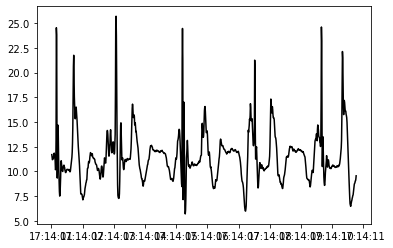

In [45]:
import matplotlib.pyplot as plt

plt.plot(rawDf.TimeStamp[:1000],rawDf.Resultant_Accel_LN_[:1000], color='black')
for i,bar in enumerate(tagDf.values.reshape(51,3,3)[10:15]):
    times = np.take(bar,0, axis=1)
    times = [t - datetime.timedelta(0,1) for t in times]
    a = times[0]
    b = times[1]
    vals = dataDf.Resultant_Accel_LN_[20:]
    #vals = [0,25]
    if i==0:
        plt.fill_between([times[0],times[1]], np.min(vals), np.max(vals), alpha =0.6, color = 'gray', label = "transition to touch")
        plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'pink', label = "touch left eye")
    else:
        plt.fill_between([times[0],times[1]], np.min(vals), np.max(vals), alpha =0.6, color = 'gray')
        plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'pink')

Index(['Unnamed: 0', 'time', 'status'], dtype='object')

In [ ]:
rawDf.columns

In [7]:

def _get_raw_tag_df(root, file):
    """ Load dfs

    Args:
        root (str): root name of file
        file (str): file name

    Returns:
        (df, df): 2 raw and tag dfs 
    """
    filePathRaw = os.path.join(root, file)
    filePathTag = os.path.join("data/unclean/tags/" + root[-1], file_name_splitter(file, type='s'))
    rawDf = process_rawdata(filePathRaw)
    tagDf = pd.read_csv(filePathTag)
    return rawDf, tagDf

def _pull_pid(name):
    name = file_name_splitter(name,type='s')
    name = name.split('_')[0]
    return name

def _pull_description(name):
    """ get the activity description
    Args:
        name (str): fileName 
    Returns:
        str: activity description
    """
    name = file_name_splitter(name,type='s')
    desc = name.strip('.csv').split("_")[1:]
    desc = '_'.join(desc)
    return desc

def _pull_label(name):
    """get the activity description

   Args:
        name (str): fileName 

    Returns:
        str: activity label (1,0)
    """
    name = file_name_splitter(name,type='s')
    if name.split('_')[1] in ['le', 're', 'n', 'm']:
        label = 1
    else:
        label = 0
    return label

def _pull_feature(root, file, sliceLen):
    """ takes a single df and extracts features

    Args:
        root (str): root name of file
        file (str): file name

    Returns:
        [type]: features df either static or dynamic
    """
    feats =list()
    rawDf, tagDf = _get_raw_tag_df(root, file)
    # filter touch points
    tagDf = tagDf[tagDf["status"]=="y"]

    fileParts = file.strip(".csv").split("_")

    feats = list()
    if fileParts[2]==fileParts[1]:
        feats = __type_static(rawDf,tagDf, sliceLen)
    else:
        feats = __type_dynamic(rawDf,tagDf, sliceLen)

    return feats

def __type_dynamic(rawDf, tagDf, sliceLen):
    """ for dynamic activities

    Args:
        rawDf (df): raw data
        tagDf (df): tags data

    Returns:
        features
    """
    feats = list()
    for tPoint in tagDf.time.values:
        try:
            index = rawDf.iloc[rawDf.set_index('TimeStamp').index.get_loc(tPoint ,method='nearest')].name
            
            #feat = rawDf.Resultant_Accel_LN_[index-30:index+20].values
            feat = rawDf[["Accel_LN_X_CAL","Accel_LN_Y_CAL","Accel_LN_Z_CAL",
              "Resultant_Accel_LN_",
               "Gyro_X_CAL", "Gyro_Y_CAL", "Gyro_Z_CAL",
                "Resultant_Gyro_"]][index-sliceLen:index].values#.flatten()
            
            if feat.shape==(sliceLen,8):
                feats.append(feat)
        
        except:
            pass
    
    print("dynamic feats shape {}".format(np.array(feats).shape))
    return feats

def __type_static(rawDf,tagDf, sliceLen):
    """ for static activities

    Args:
        rawDf (df): raw data
        tagDf (df): tags data

    Returns:
        features
    """
    feats = list()
    length = len(rawDf)
    rawDf = rawDf[300:length-300]
    
    length = sliceLen*20#len(rawDf) - len(rawDf)%50
    rawDf = rawDf[:length]

    #feats = rawDf.Resultant_Accel_LN_.values.reshape(int(length/50),50)
    feats = rawDf[["Accel_LN_X_CAL","Accel_LN_Y_CAL","Accel_LN_Z_CAL",  
    "Resultant_Accel_LN_", "Gyro_X_CAL",
     "Gyro_Y_CAL", "Gyro_Z_CAL",
      "Resultant_Gyro_"]].values.reshape(int(length/sliceLen),sliceLen,8)[:20]#.flatten().reshape(int(length/50),150)
    
    print("static feats shape {}".format(np.array(feats).shape))
    feats = list(feats)
    #print("static feats length %d" %len(feats))
    return feats


for ext in tqdm.tqdm(["80_8"]):
    sliceLen = int(ext.split("_")[0])

    features = list()
    labels = list()
    descriptions = list()
    pids = list()
    for root,dirs,files in tqdm.tqdm(os.walk("data/unclean/raw")):
        for file in files:
            rawDf, tagDf = _get_raw_tag_df(root, file)
            
            description = _pull_description(file)
            label = _pull_label(file)
            feature = _pull_feature(root,file, sliceLen)
            pid = _pull_pid(file)
            descriptions.extend([description]*len(feature))
            labels.extend([label]*len(feature))
            pids.extend([pid]*len(feature))
            features.extend(feature)
            #break


    features = np.array(features)
    labels = np.array(labels)
    descriptions = np.array(descriptions)
    pids = np.array(pids)
    labels_descriptions = np.hstack((pids.reshape(-1,1),descriptions.reshape(-1,1),labels.reshape(-1,1)))


    s = features.shape
    feat2D = features.reshape(s[0], s[1]*s[2])
    np.savetxt("features{}.txt".format(ext),feat2D)
    np.savetxt("labels{}.txt".format(ext),labels_descriptions,fmt = "%s %s %s")


    meta = meta = {"columns" : ["Accel_LN_X_CAL","Accel_LN_Y_CAL","Accel_LN_Z_CAL",  "Resultant_Accel_LN_", "Gyro_X_CAL", "Gyro_Y_CAL", "Gyro_Z_CAL", "Resultant_Gyro_"],
        "timeLength" : "0.{} seconds".format(int(ext.split("_")[0])/100),
        "instanceSegmented" : "{} samples going back from key press y".format(ext.split("_")[0]),
        "cols" : 8,
        "length" : ext.split("_")[0]
        }

    with open("data/dataset/rawExtract/meta{}.json".format(ext), 'w') as jsonFile:
        json.dump(meta, jsonFile)

  0%|          | 0/1 [00:00<?, ?it/s]

dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)


/tmp/ipykernel_916436/491436087.py:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  rawDf = process_rawdata(filePathRaw)


static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (16, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (27, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)


dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)


dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (22, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (20, 80, 8)
dynamic feats shape (13, 80, 8)
dynamic feats shape (14, 80, 8)
dynamic feats shape (15, 80, 8)
dynamic feats shape (14, 80, 8)
dynamic feats shape (16, 80, 8)
dynamic feats shape (15, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (14, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (16, 80, 8)
dynamic feats shape (15, 80, 8)


dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)


dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (27, 80, 8)
dynamic feats shape (30, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (19, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (20, 80, 8)
dynamic feats shape (19, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (27, 80, 8)
dynamic feats shape (20, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (21, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (21, 80, 8)
static feats shape (20, 80, 8)


dynamic feats shape (19, 80, 8)
dynamic feats shape (17, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)


dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (16, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (16, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)


dynamic feats shape (17, 80, 8)
dynamic feats shape (14, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)


dynamic feats shape (20, 80, 8)
dynamic feats shape (21, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (15, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (10, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (10, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (19, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (19, 80, 8)


dynamic feats shape (16, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)
static feats shape (20, 80, 8)
static feats shape (20, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (19, 80, 8)
dynamic feats shape (18, 80, 8)
dynamic feats shape (17, 80, 8)


11it [00:42,  3.90s/it]

dynamic feats shape (18, 80, 8)
dynamic feats shape (18, 80, 8)



100%|██████████| 1/1 [00:44<00:00, 44.46s/it]


In [ ]:
s = features.shape
features[0][0]#.reshape(s[0], s[1]*s[2])

In [ ]:
s = features.shape
features.reshape(s[0], s[1]*s[2]).reshape(s[0], s[1], s[2])[0][0]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initi
    # alized.
    print('Could not initialize the tensorflow gpu')
    pass

In [ ]:
input = layers.Input(shape = (50,3))
model = layers.Conv1D(50, kernel_size = 3, activation='relu')(input)
model = layers.GlobalAveragePooling1D()(model)
model = layers.Flatten()(model)

output = layers.Dense(1)(model)
model = tf.keras.Model(inputs=[input], outputs=output)
optimizer = tf.keras.optimizers.Adam(1e-3)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(loss = loss, optimizer=optimizer, metrics = ['accuracy'])

In [ ]:
pids

In [ ]:
model.fit(X_Train,y_Train, epochs=200,validation_split=0.2,shuffle=True)
preds=model.predict(X_Test)

In [ ]:
p = [1 if pp>0 else 0 for pp in preds]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(p, y_Test)

In [ ]:
# for root,dirs,files in tqdm.tqdm(os.walk("data/unclean/raw")):
#     for file in files:
#         rawDf, _ = _get_raw_tag_df(root, file)
#         description = _pull_description(file)
#         label = _pull_label(file)
#         feature = _pull_feature(root,file)
#         pid = _pull_pid(file)
#         descriptions.extend([description]*len(feature))
#         labels.extend([label]*len(feature))
#         pids.extend([pid]*len(feature))
#         features.extend(feature)

In [ ]:
# for i,feature in enumerate(features):
#     if len(feature)!=50:
#         print(len(feature))

In [ ]:
label, description

In [ ]:
np.array(features).shape

In [ ]:
fileParts = file.strip(".csv").split("_")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_Train, X_Test, y_Train, y_Test = train_test_split(features, labels, random_state=43, test_size=0.2, shuffle=True)

rf = RandomForestClassifier(n_estimators=1)

rf.fit(X_Train, y_Train)

rf.score(X_Test,y_Test)

In [ ]:
np.array(features).shape, np.array(labels).shape, np.array(descriptions).shape

In [ ]:
Counter(descriptions)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_jobs=-1)


param_grid = {
    'max_depth': [3,5,10],
    'min_samples_leaf': [15,25, 40],
    'min_samples_split': [20,40,60],
    'n_estimators': [50,100,200,300]
}

grid = GridSearchCV(rf, param_grid, verbose=3, n_jobs=-1, cv=3)

In [ ]:
grid.fit(X_Train, y_Train)

In [ ]:
select = grid.best_estimator_
select.fit(X_Train,y_Train)

In [ ]:
select.score(X_Test, y_Test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_Test, select.predict(X_Test)))

# Load raw data and tags Files

In [ ]:
fileName = "a_le_sit.csv"
tagsDf = pd.read_csv("../data/tags/b/b_m_sit.csv", index_col=[0])
dataDf = process_rawdata("../data/raw/b/20210910171401b_m_sit.csv")
tagsDf['time'] = pd.to_datetime(tagsDf.time) + datetime.timedelta(0,1)

In [ ]:
import datetime

datetime.datetime.strptime('20210910105115', "%Y%m%d%H%M%S") + datetime.timedelta(0,1)

In [ ]:
dataDf['TimeStamp'] = [datetime.datetime.strptime('20210910105115', "%Y%m%d%H%M%S") +
                       datetime.timedelta(0,v/51) for v in dataDf.index+1]

In [ ]:
plt.figure(figsize = (7,5),dpi=120)

#plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Resultant_Accel_LN_[:1000])

plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Resultant_Accel_LN_[2000:3000], color='black')

# plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Accel_LN_X_CAL[2000:3000], label = 'x-Accel')
# plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Accel_LN_Y_CAL[2000:3000], label = 'y-Accel')
# plt.plot(dataDf.TimeStamp[2000:3000],dataDf.Accel_LN_Z_CAL[2000:3000], label = 'z-Accel')

plt.xticks(rotation=45)

# d = data['Date'].values
# plt.fill_between(d, data['A'], data['B'],
#                 where=data['A'] >= data['B'],
#                 facecolor='green', alpha=0.2, interpolate=True)


for i,bar in enumerate(tagsDf.values.reshape(27,3,2)[8:13]):
    times = np.take(bar,0, axis=1)
    times = [t - datetime.timedelta(0,1) for t in times]
    a = times[0]
    b = times[1]
    vals = dataDf.Resultant_Accel_LN_[2000:3000]
    #vals = [0,25]
    if i==0:
        plt.fill_between([times[0],times[1]], np.min(vals), np.max(vals), alpha =0.6, color = 'gray', label = "transition to touch")
        plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'pink', label = "touch left eye")
    else:
        plt.fill_between([times[0],times[1]], np.min(vals), np.max(vals), alpha =0.6, color = 'gray')
        plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'pink')
        
plt.xlabel("Time (HH:MM:SS)")
    #plt.fill_between([times[1],times[2]], np.min(vals), np.max(vals), alpha =0.6, color = 'yellow')

    # #     plt.fill_between(np.take(bar,0))
    
# #     print(np.take(bar,0))
# #     pos= np.sum(np.take(bar,0))
# #     print(pos)
#     plt.bar(np.take(bar,0), 27.5, datetime.timedelta(0,20))
    
#     val= [max_val]
#     width = [bar[2][0]-bar[0][0]]
#     ax2.bar(pos,val,width, color = 'black', alpha = 0.1)
plt.legend()
#plt.savefig("r.png")
plt.show()
#plt.bar()
%matplotlib inline

In [ ]:
for val in tagsDf.values.reshape(27,3,2)[:4]:
    print(np.take(val,0, axis=1))